In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

# evaluation
from sklearn.metrics import classification_report, confusion_matrix

# pipeline
from sklearn.pipeline import Pipeline

### 1) Understanding and making the data ready for preprocessing

In [58]:
# Loading Dataset
df = pd.read_csv("./data/amazonReview/test.csv")
#df = pd.read_csv("./data/amazonReview/train.csv")

# Resizing the dataset, for faster computing time. A random sample from the dataset https://stackoverflow.com/questions/40986230/reduce-dataframe-size-in-pandas
df = df.sample(frac=0.1) # Get 10% of the data

In [59]:
# Getting a quick overview of the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 80274 to 215693
Data columns (total 3 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                   

,2,Great CD,"My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing ""Who was that singing ?"""
80274,1,Got better reslults with green tea,I know everyone is different but I saw zero di...
202097,1,It doesn't come with a long handle,I think this looks like it could be a good pro...
382328,2,A great introductory text for this topic,I consider this to be the book of choice for s...
165617,2,HARD TO FIND ITEM,I needed this item to replace one that I bough...
171344,2,Filter set 3 piece,Purchased the 3 piece filter set for this vacu...


In [60]:
# Renaming columns. Inspiration from Method three: https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/
df.set_axis(['polarity', 'title', 'text'], axis='columns', inplace=True)
df.head()

,polarity,title,text
80274,1,Got better reslults with green tea,I know everyone is different but I saw zero di...
202097,1,It doesn't come with a long handle,I think this looks like it could be a good pro...
382328,2,A great introductory text for this topic,I consider this to be the book of choice for s...
165617,2,HARD TO FIND ITEM,I needed this item to replace one that I bough...
171344,2,Filter set 3 piece,Purchased the 3 piece filter set for this vacu...


In [61]:
#Assigning the text column to X and the emotions to y. https://medium.com/codex/how-to-set-x-and-y-in-pandas-3f38584e9bed
y_col = 'polarity'
y = df[y_col]
X = df[df.columns.drop(y_col)]
X.head()

,title,text
80274,Got better reslults with green tea,I know everyone is different but I saw zero di...
202097,It doesn't come with a long handle,I think this looks like it could be a good pro...
382328,A great introductory text for this topic,I consider this to be the book of choice for s...
165617,HARD TO FIND ITEM,I needed this item to replace one that I bough...
171344,Filter set 3 piece,Purchased the 3 piece filter set for this vacu...


In [62]:
y.head()

80274     1
202097    1
382328    2
165617    2
171344    2
Name: polarity, dtype: int64

### 2) Preprocessing

In [63]:
# Checking the integrity of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 80274 to 215693
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   polarity  40000 non-null  int64 
 1   title     39999 non-null  object
 2   text      40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [64]:
# Drop any rows that have missing values
df = df.dropna()

# Checking the result
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39999 entries, 80274 to 215693
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   polarity  39999 non-null  int64 
 1   title     39999 non-null  object
 2   text      39999 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [65]:
# Train test splitting the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
# Using the count vectorizer https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/
vectorizer = CountVectorizer()
 
#Fitting on the X_train data
vectorizer.fit(X_train['text'])

# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)
 

#Transforming both the training and test data
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
 
# Summarizing the Encoded Texts
#print("Encoded Document is:")
#print(X_train.toarray())

Vocabulary:  {'we': 54366, 'got': 22001, 'these': 49975, 'toys': 50943, 'as': 4252, 'hand': 22964, 'me': 31372, 'down': 15640, 'in': 25338, 'perfect': 36890, 'condition': 11207, 'which': 54696, 'speaks': 46622, 'to': 50564, 'their': 49860, 'durability': 16143, 'introduced': 26452, 'them': 49883, 'at': 4500, 'months': 32725, 'and': 3308, 'my': 33386, 'son': 46288, 'really': 40495, 'loves': 30011, 'they': 50002, 'are': 4009, 'easily': 16377, 'cleaned': 10114, 'lots': 29939, 'of': 34868, 'fun': 20731, 'play': 37728, 'with': 55109, 'motivate': 32940, 'crawling': 12284, 'ultimately': 51942, 'think': 50061, 'will': 54946, 'have': 23290, 'racing': 40029, 'or': 35295, 'giving': 21583, 'personalities': 37047, 'for': 20063, 'imagination': 25098, 'since': 45359, 'he': 23372, 'boy': 7202, 'there': 49941, 'fewer': 19253, 'options': 35290, 'boys': 7216, 'this': 50094, 'area': 4011, 've': 53254, 'recommended': 40739, 'many': 30782, 'other': 35518, 'moms': 32625, 'grandmoms': 22167, 'based': 5444, 'on

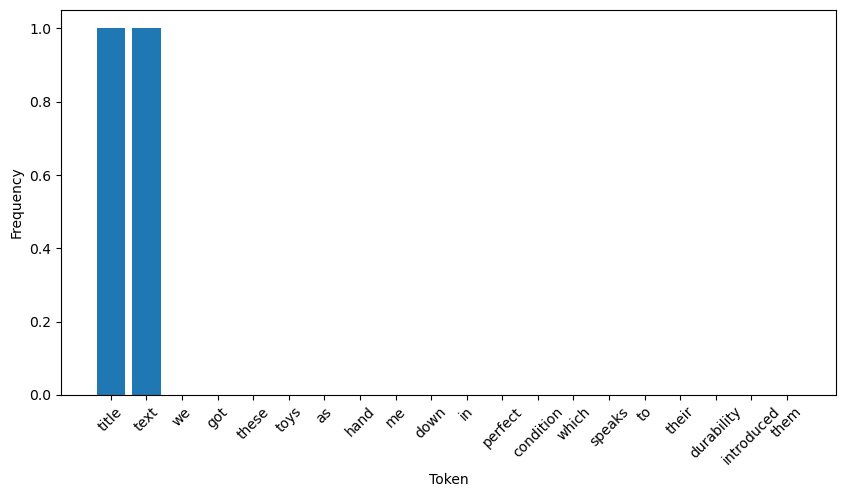

In [67]:
# Displaying the data to get a better understanding. Code taken from LAB4
def top_n_tokens(X, cv, N, plot=True):
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    top_words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:N]

    if plot:
        plt.figure(figsize=(10, 5))
        plt.bar([w[0] for w in top_words_freq], [w[1] for w in top_words_freq])
        plt.xticks(rotation=45)
        plt.xlabel('Token')
        plt.ylabel('Frequency')
        plt.show()
    else:
        return top_words_freq
    
top_n_tokens(
    X= X_train, 
    cv= vectorizer, 
    N=20
)